In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

# Clustering [25 points]
Given m data points $x^i$ , i = 1, . . . , m, K-means clustering algorithm groups them into k clusters by mini-
mizing the distortion function over {$r^{ij} , μ^j$}


$$
J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j ||^2
$$

where $r^{ij}$ = 1 if $x^i$ belongs to the j-th cluster and $r^{ij}$ = 0 otherwise.



## 1.
### Prove that using the squared Euclidean distance $||x^i - \mu^j||^2$ as the dissimilarity function and minimizing the distortion function, we will have

$$
\mu^j = \frac{\sum_i r^{ij} x^i}{\sum_i r^{ij}}
$$


### **Answer**

with

$$
J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j ||^2
\tag{1}
$$

taking the derivative of (1) with respect to $\mu^j$

$$
\frac{\partial J}{\partial \mu^j} = -2 \sum_{i=1}^m \sum_{j=1}^k r^{ij} (x^i - \mu^j )
$$
$$
= \sum_{i=1}^m \sum_{j=1}^k  (-2r^{ij}x^i + 2r^{ij}\mu^j )
\tag{2}
$$

Setting (2) equal to 0 and solving for $\mu^j$ yields

$$
\sum_{i=1}^m \sum_{j=1}^k  (-2r^{ij}x^i + 2r^{ij}\mu^j ) = 0 
$$
$$
2r^{ij}\mu^j = 2r^{ij}x^i
$$

$$
\mu^j = \frac{\sum_i 2r^{ij}x^i}{\sum_i 2r^{ij}}
\tag{3}
$$


reducing (3) yields

$$
\boxed{\mu^j = \frac{\sum_i r^{ij}x^i}{\sum_i r^{ij}}}
$$

## 2.
### Now suppose we replace the similarity function (the squared $ℓ_2$ distance here: $||x^i - \mu^j||^2$ by another distance measure, the quadratic distance (also known as the Mahalanobis distance) $d(x, y) = (x − y)^T Σ(x − y)$, where the given weight matrix Σ is symmetrical and positive definite (meaning that the corresponding d(x, y) > 0 when $x \ne y$). (i) Show (prove) that the centroid in this case will be the same 

$$
\mu^j = \frac{\sum_i r^{ij} x^i}{\sum_i r^{ij}}
$$


### **Answer**
with

$$
J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} (x^i - \mu^j)^T \Sigma (x^i - \mu^j)
\tag{1}
$$


Noting that $X^TX = X^2$, (1) becomes

$$
J = \sum_{i=1}^m \sum_{j=1}^k r^{ij} \Sigma (x^i - \mu^j)^2
\tag{2}
$$


Taking the derivative of (2) with respect to $\mu$ yields

$$
\frac{\partial J}{\partial \mu} = -2 \Sigma \sum_{i=1}^m \sum_{j=1}^k r^{ij}(x^i - \mu^j)
$$
$$
= \sum_{i=1}^m \sum_{j=1}^k -2 \Sigma x^i + 2 \Sigma \mu^j
\tag{3}
$$


Setting (3) equal to 0 and solving for $\mu$

$$
\sum_{i=1}^m \sum_{j=1}^k -2 \Sigma r^{ij} x^i + 2 \Sigma r^{ij} \mu^j = 0
$$
$$
2 \Sigma r{ij} \mu^j  = 2 \Sigma r^{ij} x^i
$$
$$
\mu^j = \frac{2 \Sigma r^{ij} x^i}{2 \Sigma r^{ij}}
\tag{4}
$$

Reducing (4) yields

$$
\boxed{\mu^j = \frac{\sum_i r^{ij}x^i}{\sum_i r^{ij}}}
$$


### (ii) However, the assignment function will be different – comment how the assignment function $r^{ij}$ should be in this case. Thus, the point is here that, depending on the similarity function, the results of k-means may be different.

### Answer
Note that the assignment will be different between the two similarity functions because $d(x, y) = (x − y)^T Σ(x − y) \ne  ||x - y ||^2$. Although similar, the former (Mahalanobis distance) multiplies the squared differences by a corresponding weight matrix which in turn potentially adjusts what would have been cluster assignment before weight multiplication

## 3. 
### Prove (using mathematical arguments) that K-means algorithm converges to a local optimum in finite steps.

### **Answer** 

The first thing to note is that the algorithm iteraties over a training set that is finite. No new points are added, nor are points removed. Centroids are randomly initialized within the latent space. At time $\tau$ we iterate over each point and  assign them to a centroid (cluster) that minimizes:

$$
J_{\tau} = \sum_{i=1}^m \sum_{j=1}^k r^{ij} ||x^i - \mu^j ||^2
$$

The centroid locations are then updated with respect to all points that make up its cluster. This is done by taking the positional mean of the "within cluster points" positions:

$$
\mu^j_{\tau} = \frac{\sum_i r^{ij} x^i}{\sum_i r^{ij}}
$$

Upon next iteration $\tau + 1$ we iterate and calculate again 

$$
J_{\tau + 1}
$$

Since we moved the centroids closer to their "within cluster points" that minimized J, there's only two possiblities:

1. $J_{\tau} > J_{\tau + 1}$
2. $J_{\tau} = J_{\tau + 1}$

For case (1), if we find that $J_{\tau} > J_{\tau + 1}$, this means we have found cluster groupings with a lower cost at iteration $\tau + 1$. The centroids $\mu_{\tau + 1}$are then updated accordingly with the new classifications 

For case (2), if $J_{\tau} = J_{\tau + 1}$ then no points have changed clusters. Therefore, the centroid update equation $\mu_{\tau} = \mu_{\tau + 1}$. Since the centroids didn't update, on iteration $\tau + 2$, it will be true that $J_{\tau + 2} = J_{\tau + 1}\ \  \therefore J_{\tau + 1} = J_{\tau + 2} = J_{\tau + 3} ...... = J_{\tau + inf}$. The algorithm has converged. However it is important to note that convergence isn't necessarily at the global minimum due to the random initialization of the centroids.

The key thing to remember is that we are iterating over a finite set of data points that are stationary. Since only (1) & (2) are possible. Eventually the centroids will converge to a position s.t. only (2) is possible.

## 4. 
### Calculate k-means by hands. Given 5 data points configuration in Figure 1. Assume k = 2 and use Manhattan distance (a.k.a. the $ℓ_1$ distance: given two 2-dimensional points (x 1 , y 1 ) and (x 2 , y 2 ), their distance is |x 1 − x 2 | + |y 1 − y 2 |). Assuming the initialization of centroid as shown, after one iteration of k-means algorithm, answer the following questions.

In [2]:
#generate the points
points = [
    (2,2),
    (-1,1),
    (3,1),
    (0,-1),
    (-2,-2)
]

#initialize the 2 centroids
centroids = [
    (-3, -1),
    (2, 1)
]

#label for points
labsP = (1,2,3,4,5)

#label for centroids
labsC = ('A', 'B')

In [3]:
def plotit():
    plt.figure(figsize=(15,8))
    plt.scatter(x=[x[0] for x in points], y=[x[1] for x in points], color='yellow', edgecolor='k', s=300,zorder=3)
    plt.scatter(x=[x[0] for x in centroids], y=[x[1] for x in centroids], marker='s', color='purple', edgecolor='k', s=300, zorder=3)
    plt.plot(np.linspace(-4,4), [0]*len(np.linspace(-4,4)), color='k', lw=5)
    plt.plot([0]*len(np.linspace(-4,4)),np.linspace(-4,4),  color='k', lw=5)
    for pos, x in enumerate(labsP):
        plt.text(points[pos][0]-0.035, points[pos][1]-0.035, x)
    for pos, x in enumerate(labsC):
        plt.text(centroids[pos][0]-0.035, centroids[pos][1]-0.035, x, color='white')
    plt.grid('on')
    plt.ylim([-3, 3])
    plt.xlim([-4,4])
    plt.show()

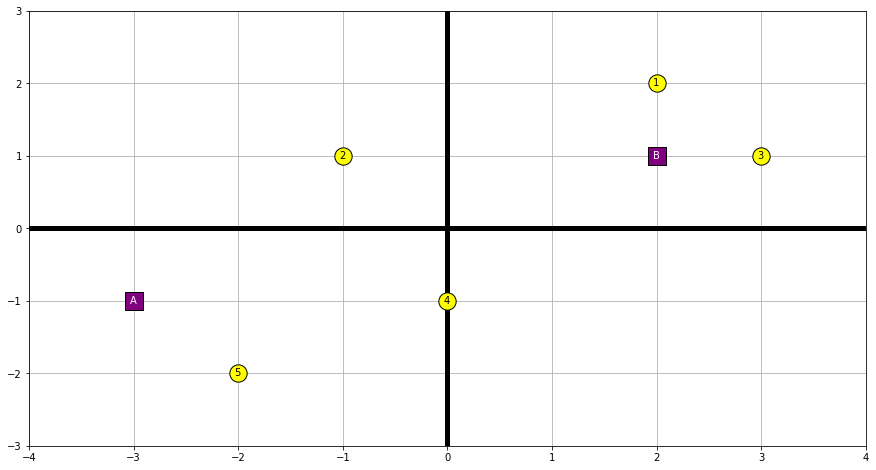

In [4]:
plotit()

### (a.) Show the cluster assignment

In [5]:
def manhattan_distance(point, centroid):
    #calculate manhattan distance
    return np.abs(point[0] - centroid[0]) + np.abs(point[1] - centroid[1])

def classify():
    #placeholder for each points classification
    classifications = []

    for pos1, p in enumerate(points):
        #initialize large distance metric
        dist = np.inf
        for pos2, c in enumerate(centroids):
            #make note of what the prev best distance was
            prev = dist
            #compare new manhattan distance from prev
            dist = min(dist, manhattan_distance(p, c))
            #if new distance make sure to make note of which cluster the min distance corresponds to
            if dist != prev:
                lowest = labsC[pos2]
        #save best cluster
        classifications.append(lowest)
    return classifications

In [6]:
classifications = classify()
classifications

['B', 'B', 'B', 'A', 'A']

#### The cluster assignments after the first iteration have the points [(2,2),(-1,1),(3,1)] assigned to centroid **B** while the points [(0,-1),(-2,-2)] are assigned to cluster **A**. The graph belows shows proper cluster assignments

In [7]:
colors = {'A':'blue', 'B':'red'}
def plotit2(title):
    plt.figure(figsize=(15,8))
    for pos, c in enumerate(classifications):
        plt.scatter(x=points[pos][0], y=points[pos][1], color=colors[c], edgecolor='k', s=300,zorder=3)

    for pos, c in enumerate(centroids):
        plt.scatter(x=c[0], y=c[1], marker='s', color=colors[labsC[pos]], edgecolor='k', s=300, zorder=3)

    plt.plot(np.linspace(-4,4), [0]*len(np.linspace(-4,4)), color='k', lw=5)
    plt.plot([0]*len(np.linspace(-4,4)),np.linspace(-4,4),  color='k', lw=5)
    for pos, x in enumerate(labsP):
        plt.text(points[pos][0]-0.035, points[pos][1]-0.035, x, color='white')
    for pos, x in enumerate(labsC):
        plt.text(centroids[pos][0]-0.035, centroids[pos][1]-0.035, x, color='white')
    plt.title(title)
    plt.grid('on')
    plt.ylim([-3, 3])
    plt.xlim([-4,4])
    plt.show()

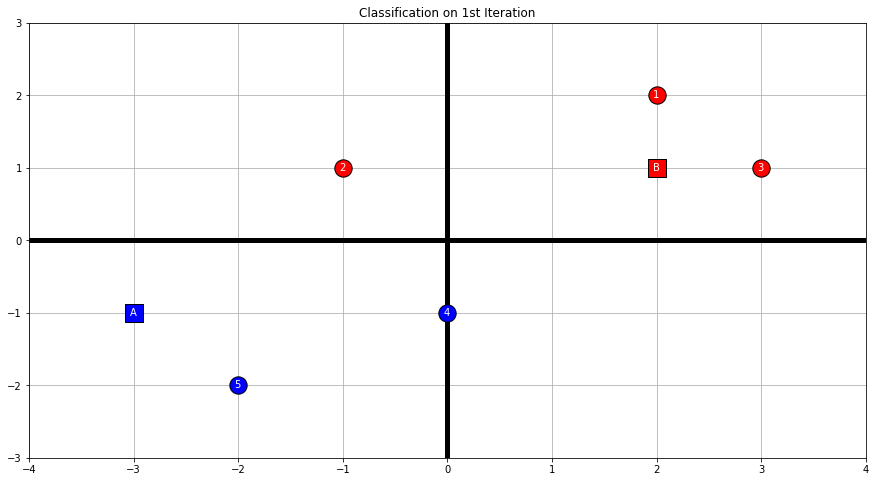

In [8]:
plotit2(title='Classification on 1st Iteration')

### (b.) Show the location of the new center 

In [9]:
def new_center(idxs):
    #calculate the average x and y position for all points in cluster
    x,y = 0.0, 0.0
    n = len(idxs) * 1.0
    for idx in idxs:
        x += points[idx][0]
        y += points[idx][1]
        
    return (x/n , y/n)



def update_center():
    #get the points in cluster A
    A_points = np.argwhere(np.array(classifications) == 'A').ravel()
    #get the points in cluster B
    B_points = np.argwhere(np.array(classifications) == 'B').ravel()

    cluster_points = (A_points, B_points)
    
    #Update centers using points in clusters
    for i in range(len(centroids)):
        centroids[i] = new_center(cluster_points[i])

In [10]:
update_center()

print('New Centroid A: {}\nNew Centroid B: {}'.format(*centroids))

New Centroid A: (-1.0, -1.5)
New Centroid B: (1.3333333333333333, 1.3333333333333333)


#### After cluster assignments, centroid **A** is assigned to the location (-1.0, -1.5) and centroid **B** is assigned to the location (1.33, 1.33). The graph below shows updated centroid locations 

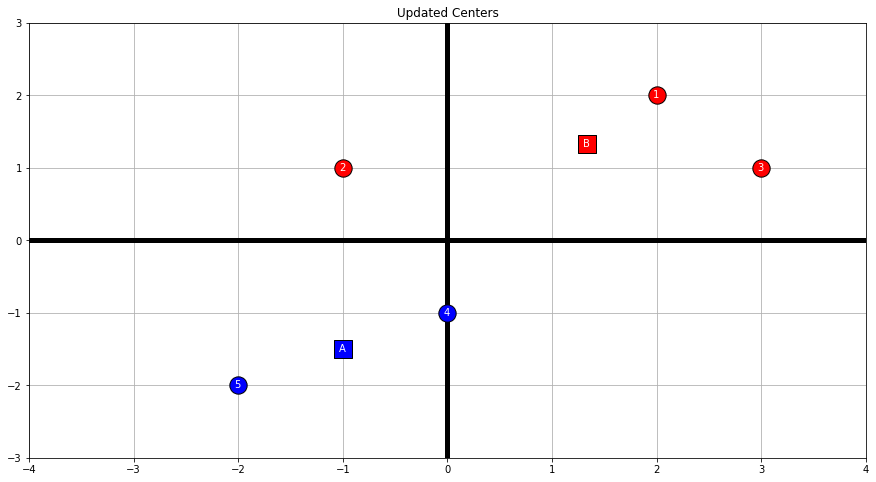

In [11]:
plotit2(title = 'Updated Centers')

### (c.) Will it terminate in one step?

#### Visually we can see that no, it won't terminate in one step. With the new updated centroid locations, point 2's manhattan distance is closer to centroid A than centroid B. However, let's not leave it to visual assumptions. Let's run another update. Before running the update, we will manually check the manhattan distance specifically for point 2 with respect to the two centroids

In [12]:
print('Point 2 ----> Centroid A: {}'.format(manhattan_distance(points[1], centroids[0])))
print('Point 2 ----> Centroid B: {}'.format(manhattan_distance(points[1], centroids[1])))

Point 2 ----> Centroid A: 2.5
Point 2 ----> Centroid B: 2.666666666666666


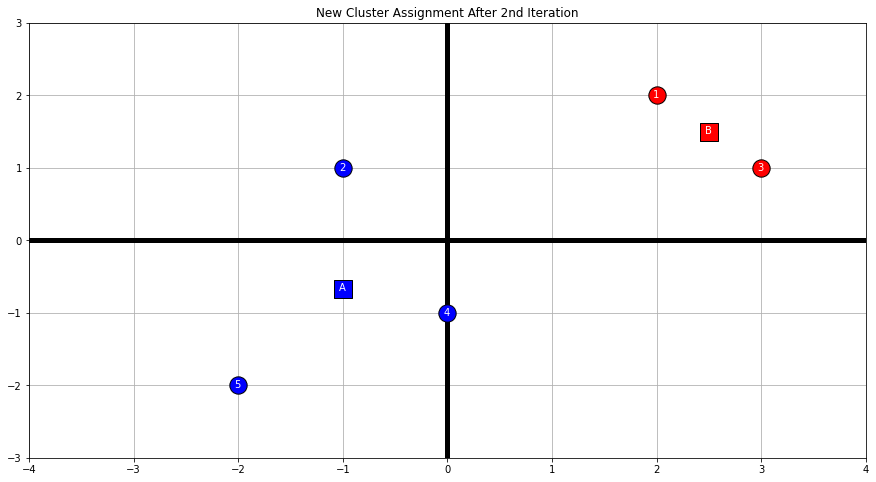

In [13]:
classifications = classify()
update_center()
plotit2(title='New Cluster Assignment After 2nd Iteration')

#### As we can see, point 2 was closer to Centroid A. Therefore it was reclassified and the position for both centroids was updated 